In [2]:
#Now linear regression with multiple variable

import pandas as pd

df = pd.read_csv(r'E:\Machine Learning\Exercises\machine-learning-ex1\ex1\ex1data2.txt',names = ['House Size(Square feet)',"#Bedrooms",'Price'])
df

,House Size(Square feet),#Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
#Normalizing Feature

x1 = df['House Size(Square feet)']
x2 = df['#Bedrooms']
y = df['Price']

a = np.array(x1).reshape(1,len(x1))
b = np.array(x2).reshape(1,len(x1))

x1mean = a.mean()
x1std = a.std()

x2mean = b.mean()
x2std = b.std()

print(x1std)
print(x2std)

print (x1mean)
print(x2.mean())

x1 = [(x1[i]-x1mean)/x1std for i in range(len(x1))]
x2 = [(x2[i]-x2mean)/x2std for i in range(len(x2))]


print(y)

786.2026187430467
0.7528428090618781
2000.6808510638298
3.1702127659574466
0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: Price, dtype: int64


In [4]:
#COST AND GRADIENT FUNCTION


import numpy as np
#print(len(x))
lst = [1 for i in range(len(x1))]

#creating the matrix X by adding column of ones
X = np.array([lst,x1,x2])
X = X.transpose()
print(X)

#creating the matrix of y as Y
Y = np.array(y)
Y = Y.transpose()
Y = Y.reshape(len(y),1)
print(Y)


[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [5]:
#Creating Theta
theta = np.zeros((3,1))
print(theta.shape)

(3, 1)


In [6]:
#given values
iterations = 1500
alpha = 0.01

In [7]:
#Computing hypothesis

def hypothesis(theta,X):
    return X.dot(theta)

In [8]:
#partial derivative of cost function of theta[0] multipy by (alpha/m)
def pdJtheta0(alpha,m,Y,theta,X):
    return ((((hypothesis(theta,X)-Y).sum())*alpha)/m)

#partial derivative of cost function of theta[1] multipy by (alpha/m)
def pdJtheta1(alpha,m,Y,theta,X):
    temp = hypothesis(theta,X)-Y
    tempx = np.array(x1).reshape(1,len(x1))
    return ((tempx.dot(temp))*(alpha/m))

def pdJtheta2(alpha,m,Y,theta,X):
    temp = hypothesis(theta,X)-Y
    tempx = np.array(x2).reshape(1,len(x1))
    return ((tempx.dot(temp))*(alpha/m))


#print (pdJtheta1(alpha,len(x),Y,theta,X))

In [9]:
#computing the cost 
def computeCost(theta):
    mat = X.dot(theta) - Y

    sum = 0
    for ele in range(len(x1)):
        sum+= mat[ele]**2
    
    return (sum/(2*len(a)))

print(computeCost(theta))

[3.08280276e+12]


In [10]:
#For storing cost for each theta[0] and theta[1]
allTheta0 = []
allTheta0.extend(theta[0])

allTheta1 = []
allTheta1.extend(theta[1])

allTheta2 = []
allTheta1.extend(theta[2])


allCost = []
allCost.extend(computeCost(theta))


#performing the iterations in gradient descent
def GradientDescent(iterations):
    for i in range(iterations):
        temp0 = theta[0]-pdJtheta0(alpha,len(x1),Y,theta,X)
        temp1 = theta[1]-pdJtheta1(alpha,len(x1),Y,theta,X)
        temp2 = theta[2]-pdJtheta2(alpha,len(x1),Y,theta,X)

        theta[0] = temp0
        theta[1] = temp1
        theta[2] = temp2

        allTheta0.extend(temp0)
        allTheta1.extend(temp1)
        allTheta2.extend(temp2)
        allCost.extend(computeCost(theta))

        print(theta,computeCost(theta))
    
GradientDescent(iterations)

[[3404.12659574]
 [1057.64133493]
 [ 547.08821756]] [3.02199548e+12]
[[6774.21192553]
 [2101.64274191]
 [1082.78310833]] [2.96245786e+12]
[[10110.59640202]
 [ 3132.20441912]
 [ 1607.2749847 ]] [2.90416263e+12]
[[13413.61703375]
 [ 4149.52349706]
 [ 2120.75113489]] [2.84708313e+12]
[[16683.60745915]
 [ 5153.79408617]
 [ 2623.39587038]] [2.79119331e+12]
[[19920.89798031]
 [ 6145.20732373]
 [ 3115.39057257]] [2.73646767e+12]
[[23125.81559625]
 [ 7123.95141992]
 [ 3596.91373875]] [2.6828813e+12]
[[26298.68403603]
 [ 8090.21170335]
 [ 4068.14102732]] [2.63040982e+12]
[[29439.82379141]
 [ 9044.17066566]
 [ 4529.2453023 ]] [2.57902941e+12]
[[32549.55214924]
 [ 9986.00800564]
 [ 4980.39667721]] [2.52871675e+12]
[[35628.1832235 ]
 [10915.90067247]
 [ 5421.76255814]] [2.47944905e+12]
[[38676.02798701]
 [11834.02290845]
 [ 5853.50768629]] [2.43120404e+12]
[[41693.39430288]
 [12740.54629095]
 [ 6275.79417975]] [2.3839599e+12]
[[44680.5869556 ]
 [13635.63977375]
 [ 6688.78157463]] [2.33769533e+12]


[[253638.14998435]
 [ 71540.08963187]
 [ 19205.39619354]] [2.96653297e+11]
[[254505.89508025]
 [ 71774.78615033]
 [ 19159.82940927]] [2.92864394e+11]
[[255364.96272519]
 [ 72007.39086266]
 [ 19113.40406931]] [2.89149765e+11]
[[256215.43969368]
 [ 72237.92949454]
 [ 19066.14047264]] [2.85507921e+11]
[[257057.41189249]
 [ 72466.42740074]
 [ 19018.05857121]] [2.81937403e+11]
[[257890.96436931]
 [ 72692.90957076]
 [ 18969.17797546]] [2.78436783e+11]
[[258716.18132136]
 [ 72917.40063439]
 [ 18919.51795979]] [2.75004661e+11]
[[259533.14610389]
 [ 73139.92486718]
 [ 18869.09746794]] [2.71639668e+11]
[[260341.9412386 ]
 [ 73360.50619586]
 [ 18817.93511829]] [2.68340459e+11]
[[261142.64842196]
 [ 73579.16820364]
 [ 18766.04920903]] [2.65105719e+11]
[[261935.34853348]
 [ 73795.93413541]
 [ 18713.45772333]] [2.61934159e+11]
[[262720.12164389]
 [ 74010.82690293]
 [ 18660.17833437]] [2.58824516e+11]
[[263497.0470232 ]
 [ 74223.86908989]
 [ 18606.22841027]] [2.55775554e+11]
[[264266.20314871]
 [ 744

 [ 10586.66248942]] [1.15714988e+11]
[[317153.03716676]
 [ 90803.75257446]
 [ 10519.9237296 ]] [1.15396932e+11]
[[317385.63339084]
 [ 90894.44826084]
 [ 10453.34147513]] [1.15084571e+11]
[[317615.90365268]
 [ 90984.60982914]
 [ 10386.91717712]] [1.14777795e+11]
[[317843.8712119 ]
 [ 91074.24173604]
 [ 10320.65224687]] [1.144765e+11]
[[318069.55909552]
 [ 91163.34838575]
 [ 10254.54805663]] [1.14180581e+11]
[[318292.99010031]
 [ 91251.93413075]
 [ 10188.60594029]] [1.13889936e+11]
[[318514.18679505]
 [ 91340.00327253]
 [ 10122.82719399]] [1.13604465e+11]
[[318733.17152285]
 [ 91427.56006229]
 [ 10057.21307684]] [1.13324072e+11]
[[318949.96640336]
 [ 91514.6087017 ]
 [  9991.76481156]] [1.13048658e+11]
[[319164.59333507]
 [ 91601.15334353]
 [  9926.48358509]] [1.12778132e+11]
[[319377.07399747]
 [ 91687.1980924 ]
 [  9861.37054928]] [1.12512399e+11]
[[319587.42985324]
 [ 91772.74700543]
 [  9796.42682145]] [1.1225137e+11]
[[319795.68215045]
 [ 91857.80409291]
 [  9731.65348505]] [1.11994

 [  2610.99308184]] [9.84454904e+10]
[[335261.77462178]
 [100151.867034  ]
 [  2571.38850347]] [9.84172337e+10]
[[335313.28347131]
 [100193.59076627]
 [  2531.94522607]] [9.83893661e+10]
[[335364.27723234]
 [100235.11813064]
 [  2492.66274223]] [9.83618815e+10]
[[335414.76105576]
 [100276.45019039]
 [  2453.5405436 ]] [9.83347737e+10]
[[335464.74004095]
 [100317.58800103]
 [  2414.57812098]] [9.83080367e+10]
[[335514.21923628]
 [100358.53261034]
 [  2375.77496434]] [9.82816646e+10]
[[335563.20363966]
 [100399.28505852]
 [  2337.13056289]] [9.82556516e+10]
[[335611.69819901]
 [100439.84637819]
 [  2298.6444051 ]] [9.82299921e+10]
[[335659.70781277]
 [100480.21759452]
 [  2260.3159788 ]] [9.82046804e+10]
[[335707.23733038]
 [100520.39972531]
 [  2222.1447712 ]] [9.8179711e+10]
[[335754.29155283]
 [100560.39378103]
 [  2184.13026891]] [9.81550785e+10]
[[335800.87523304]
 [100600.20076494]
 [  2146.27195806]] [9.81307777e+10]
[[335846.99307646]
 [100639.82167314]
 [  2108.56932425]] [9.810

 [ -2678.84085914]] [9.63615762e+10]
[[339694.236966  ]
 [105558.69583148]
 [ -2695.96184386]] [9.63585635e+10]
[[339701.42119208]
 [105575.84671026]
 [ -2713.00808584]] [9.63555799e+10]
[[339708.5335759 ]
 [105592.92153362]
 [ -2729.9799047 ]] [9.63526253e+10]
[[339715.57483589]
 [105609.92064537]
 [ -2746.87761879]] [9.63496992e+10]
[[339722.54568328]
 [105626.84438765]
 [ -2763.70154518]] [9.63468014e+10]
[[339729.44682219]
 [105643.69310098]
 [ -2780.45199972]] [9.63439316e+10]
[[339736.27894971]
 [105660.46712423]
 [ -2797.12929698]] [9.63410894e+10]
[[339743.04275596]
 [105677.16679464]
 [ -2813.7337503 ]] [9.63382746e+10]
[[339749.73892414]
 [105693.79244784]
 [ -2830.26567176]] [9.6335487e+10]
[[339756.36813065]
 [105710.34441785]
 [ -2846.72537221]] [9.63327261e+10]
[[339762.93104509]
 [105726.82303708]
 [ -2863.11316126]] [9.63299918e+10]
[[339769.42833038]
 [105743.22863636]
 [ -2879.42934729]] [9.63272837e+10]
[[339775.86064282]
 [105759.56154494]
 [ -2895.67423743]] [9.632

[[340368.26510254]
 [108302.37541978]
 [ -5433.01993216]] [9.60613406e+10]
[[340368.70904725]
 [108307.41613034]
 [ -5438.05929915]] [9.60611014e+10]
[[340369.14855253]
 [108312.43465259]
 [ -5443.07649879]] [9.60608644e+10]
[[340369.58366275]
 [108317.43108429]
 [ -5448.07162852]] [9.60606294e+10]
[[340370.01442186]
 [108322.40552277]
 [ -5453.04478533]] [9.60603965e+10]
[[340370.44087339]
 [108327.3580649 ]
 [ -5457.9960658 ]] [9.60601657e+10]
[[340370.8630604 ]
 [108332.28880717]
 [ -5462.92556607]] [9.60599369e+10]
[[340371.28102554]
 [108337.19784559]
 [ -5467.83338188]] [9.60597101e+10]
[[340371.69481103]
 [108342.08527579]
 [ -5472.71960853]] [9.60594853e+10]
[[340372.10445866]
 [108346.95119295]
 [ -5477.58434093]] [9.60592625e+10]
[[340372.51000982]
 [108351.79569185]
 [ -5482.42767354]] [9.60590416e+10]
[[340372.91150547]
 [108356.61886683]
 [ -5487.24970043]] [9.60588227e+10]
[[340373.30898616]
 [108361.42081184]
 [ -5492.05051525]] [9.60586058e+10]
[[340373.70249204]
 [1083

 [ -6076.25030645]] [9.60393775e+10]
[[340405.94921974]
 [108947.89683952]
 [ -6078.45970563]] [9.60393317e+10]
[[340406.01632329]
 [108950.09658693]
 [ -6080.65938314]] [9.60392863e+10]
[[340406.0827558 ]
 [108952.28665434]
 [ -6082.84938173]] [9.60392413e+10]
[[340406.14852399]
 [108954.46708436]
 [ -6085.02974399]] [9.60391967e+10]
[[340406.21363449]
 [108956.63791938]
 [ -6087.20051233]] [9.60391525e+10]
[[340406.27809389]
 [108958.79920165]
 [ -6089.36172894]] [9.60391086e+10]
[[340406.3419087 ]
 [108960.95097319]
 [ -6091.51343586]] [9.60390652e+10]
[[340406.40508535]
 [108963.09327588]
 [ -6093.65567493]] [9.60390221e+10]
[[340406.46763024]
 [108965.22615137]
 [ -6095.7884878 ]] [9.60389794e+10]
[[340406.52954969]
 [108967.34964117]
 [ -6097.91191594]] [9.60389371e+10]
[[340406.59084993]
 [108969.46378656]
 [ -6100.02600065]] [9.60388952e+10]
[[340406.65153718]
 [108971.56862868]
 [ -6102.13078303]] [9.60388536e+10]
[[340406.71161755]
 [108973.66420847]
 [ -6104.22630402]] [9.60

[[340410.71029363]
 [109157.19020462]
 [ -6287.74923711]] [9.60359091e+10]
[[340410.72978644]
 [109158.46897112]
 [ -6289.02799351]] [9.60358937e+10]
[[340410.74908432]
 [109159.74211057]
 [ -6290.30112301]] [9.60358785e+10]
[[340410.76818922]
 [109161.00964774]
 [ -6291.56865038]] [9.60358634e+10]
[[340410.78710307]
 [109162.27160727]
 [ -6292.83060027]] [9.60358485e+10]
[[340410.80582778]
 [109163.52801371]
 [ -6294.08699722]] [9.60358337e+10]
[[340410.82436525]
 [109164.7788915 ]
 [ -6295.33786566]] [9.6035819e+10]
[[340410.84271734]
 [109166.02426496]
 [ -6296.58322993]] [9.60358045e+10]
[[340410.86088591]
 [109167.26415832]
 [ -6297.82311423]] [9.60357901e+10]
[[340410.8788728 ]
 [109168.49859569]
 [ -6299.05754269]] [9.60357758e+10]
[[340410.89667982]
 [109169.72760109]
 [ -6300.28653931]] [9.60357616e+10]
[[340410.91430876]
 [109170.9511984 ]
 [ -6301.51012799]] [9.60357475e+10]
[[340410.93176142]
 [109172.16941144]
 [ -6302.72833252]] [9.60357336e+10]
[[340410.94903955]
 [10917

 [ -6450.39699165]] [9.6034501e+10]
[[340412.36195879]
 [109320.40162925]
 [ -6450.96004802]] [9.6034498e+10]
[[340412.36493495]
 [109320.96220852]
 [ -6451.52062675]] [9.60344951e+10]
[[340412.36788134]
 [109321.52032105]
 [ -6452.07873876]] [9.60344922e+10]
[[340412.37079827]
 [109322.0759777 ]
 [ -6452.6343949 ]] [9.60344893e+10]
[[340412.37368604]
 [109322.62918928]
 [ -6453.18760596]] [9.60344864e+10]
[[340412.37654492]
 [109323.17996654]
 [ -6453.73838273]] [9.60344835e+10]
[[340412.37937522]
 [109323.7283202 ]
 [ -6454.28673589]] [9.60344807e+10]
[[340412.38217721]
 [109324.27426093]
 [ -6454.83267613]] [9.60344779e+10]
[[340412.38495118]
 [109324.81779933]
 [ -6455.37621405]] [9.60344752e+10]
[[340412.38769741]
 [109325.35894598]
 [ -6455.91736023]] [9.60344724e+10]
[[340412.39041618]
 [109325.8977114 ]
 [ -6456.45612519]] [9.60344697e+10]
[[340412.39310777]
 [109326.43410608]
 [ -6456.99251941]] [9.6034467e+10]
[[340412.39577243]
 [109326.96814044]
 [ -6457.52655332]] [9.60344

In [11]:
#final theta and cost

print(theta)

print(computeCost(theta))

[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]
[9.60342874e+10]


In [12]:
#computing the cost of 1650 square feet and 3 bedrooms
print((np.array([1,(1650-x1mean)/x1std,(3-x2mean)/x2std])).dot(theta))



[293098.46667577]


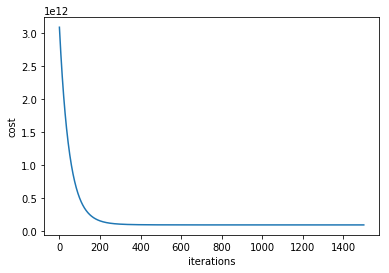

In [13]:
#Plotting...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xs = range(iterations+1)

plt.xlabel('iterations')
plt.ylabel('cost')
#plt.plot(x,y,'rx')
plt.plot(xs,allCost)
plt.show()